In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [57]:
%%capture
! pip install pingouin

In [29]:
data_dir = os.path.join('..', 'data')
df = pd.read_csv(os.path.join(data_dir, 'worldcup-2018.csv'))


In [30]:
df.head()

Team Group  Previous \nappearances  Previous \ntitles  \
0        Russia     A                      10                  0   
1  Saudi Arabia     A                       4                  0   
2         Egypt     A                       2                  0   
3       Uruguay     A                      12                  2   
4       Porugal     B                       6                  0   

   Previous\n finals  Previous\n semifinals  Current \nFIFA rank  \
0                  0                      1                   65   
1                  0                      0                   63   
2                  0                      0                   31   
3                  2                      5                   21   
4                  0                      2                    3   

  First match \nagainst  Match index  history with \nfirst opponent\n W-L  \
0          Saudi Arabia            1                                 -1.0   
1                Russia            1                                  1.0   
2               Uruguay            2                                 -1.0   
3                 Egypt            2                                  1.0   
4                 Spain            3                                -12.0   

   history with\n first opponent\n goals Second match\n against  \
0                                   -2.0                  Egypt   
1                                    2.0                Uruguay   
2                                   -2.0                 Russia   
3                                    2.0           Saudi Arabia   
4                                  -31.0                Morocco   

   Match index.1  history with\n second opponent\n W-L  \
0             17                                   NaN   
1             18                                   1.0   
2             17                                   NaN   
3             18                                  -1.0   
4             19                                  -1.0   

   history with\n second opponent\n goals Third match\n against  \
0                                     NaN               Uruguay   
1                                     1.0                 Egypt   
2                                     NaN          Saudi Arabia   
3                                    -1.0                Russia   
4                                    -2.0                  Iran   

   Match index.2  history with\n third opponent\n W-L  \
0             33                                  0.0   
1             34                                 -5.0   
2             34                                  5.0   
3             33                                  0.0   
4             35                                  2.0   

   history with\n third opponent\n goals  Unnamed: 19  
0                                    0.0          NaN  
1                                   -5.0          NaN  
2                                    5.0          NaN  
3                                    0.0          NaN  
4                                    5.0          NaN

In [31]:
df.columns = [re.sub('\s+', '_', col.lower()) for col in df.columns]

In [32]:
df.head()

team group  previous_appearances  previous_titles  previous_finals  \
0        Russia     A                    10                0                0   
1  Saudi Arabia     A                     4                0                0   
2         Egypt     A                     2                0                0   
3       Uruguay     A                    12                2                2   
4       Porugal     B                     6                0                0   

   previous_semifinals  current_fifa_rank first_match_against  match_index  \
0                    1                 65        Saudi Arabia            1   
1                    0                 63              Russia            1   
2                    0                 31             Uruguay            2   
3                    5                 21               Egypt            2   
4                    2                  3               Spain            3   

   history_with_first_opponent_w-l  history_with_first_opponent_goals  \
0                             -1.0                               -2.0   
1                              1.0                                2.0   
2                             -1.0                               -2.0   
3                              1.0                                2.0   
4                            -12.0                              -31.0   

  second_match_against  match_index.1  history_with_second_opponent_w-l  \
0                Egypt             17                               NaN   
1              Uruguay             18                               1.0   
2               Russia             17                               NaN   
3         Saudi Arabia             18                              -1.0   
4              Morocco             19                              -1.0   

   history_with_second_opponent_goals third_match_against  match_index.2  \
0                                 NaN             Uruguay             33   
1                                 1.0               Egypt             34   
2                                 NaN        Saudi Arabia             34   
3                                -1.0              Russia             33   
4                                -2.0                Iran             35   

   history_with_third_opponent_w-l  history_with_third_opponent_goals  \
0                              0.0                                0.0   
1                             -5.0                               -5.0   
2                              5.0                                5.0   
3                              0.0                                0.0   
4                              2.0                                5.0   

   unnamed:_19  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [33]:
# DATA_DIR = os.path.join("..","data")
# df = pd.read_csv(os.path.join(DATA_DIR, 'worldcup-2018.csv'))
# df.columns = [re.sub("\s+","_",col.lower()) for col in df.columns]
# df.head()


In [49]:
columns = ['previous_titles' , 'previous_finals' , 'previous_semifinals' , 'previous_appearances' ]

To help with this analysis we are going to engineer a feature that combines all of the data in the table. This feature represents the past performance of a team. Given the data we have it is the best proxy on hand for how good a team will perfom. Feel free to change the multiplers, but let’s just say that past_performance will be a linear combination of the related features we have.
past_performance = $\alpha_1 X_1 + \alpha_2 X_2 + \alpha_3 X_3 + \alpha_4 X_4α$

In [58]:
new_df = df[columns]
alpha = np.array([16, 8, 4, 1])

In [59]:
df['past_performance'] = new_df@alpha

In [62]:
df['past_performance'].head()

0    14
1     4
2     2
3    80
4    14
Name: past_performance, dtype: int64

# Using pivot table to make summaries

In [63]:
columns_to_show =['previous_appearances','previous_titles','previous_finals',
                  'previous_semifinals','current_fifa_rank','past_performance']

In [72]:
group_members = pd.pivot_table(df, index=['group', 'team'], values=columns_to_show)
group_members.head()

current_fifa_rank  past_performance  previous_appearances  \
group team                                                                      
A     Egypt                        31                 2                     2   
      Russia                       65                14                    10   
      Saudi Arabia                 63                 4                     4   
      Uruguay                      21                80                    12   
B     IRAN                         32                 4                     4   

                    previous_finals  previous_semifinals  previous_titles  
group team                                                                 
A     Egypt                       0                    0                0  
      Russia                      0                    1                0  
      Saudi Arabia                0                    0                0  
      Uruguay                     2                    5                2  
B     IRAN                        0                    0                0

In [78]:
columns_to_show = ['previous_appearances','previous_titles','previous_finals',
                  'previous_semifinals','current_fifa_rank','past_performance']
group_summary = pd.pivot_table(df, index=['group'], values=columns_to_show)
group_summary

current_fifa_rank  past_performance  previous_appearances  \
group                                                              
A                  45.00             25.00                  7.00   
B                  20.25             17.00                  7.00   
C                  17.75             19.50                  6.50   
D                  23.25             30.25                  6.25   
E                  18.25             58.25                 11.25   
F                  23.50             65.25                 13.25   
G                  25.75             16.50                  7.50   
H                  24.50              6.50                  4.50   

       previous_finals  previous_semifinals  previous_titles  
group                                                         
A                 0.50                 1.50             0.50  
B                 0.25                 1.00             0.25  
C                 0.50                 1.25             0.25  
D                 1.25                 1.50             0.50  
E                 1.75                 3.25             1.25  
F                 2.25                 4.50             1.00  
G                 0.25                 0.75             0.25  
H                 0.00                 0.50             0.00

# Checking missing value

In [96]:
### YOUR CODE HERE
row_with_missing = [row_idx for row_idx,row in new_df.isnull().iterrows() if True in row.values]
if len(row_with_missing) > 0:
    print([new_df['team'].values[r] for r in row_with_missing])
else:
    print("There were no rows with missing data")
    
## missing values summary
print("\nMissing Value Summary\n{}".format("-"*35))
print(new_df.isnull().sum(axis = 0))

There were no rows with missing data

Missing Value Summary
-----------------------------------
previous_titles         0
previous_finals         0
previous_semifinals     0
previous_appearances    0
dtype: int64


# Visualizing 

In [97]:
import os
import re
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels as sm
import pingouin

import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

SMALL_SIZE = 8
MEDIUM_SIZE = 10
LARGE_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

Text(0, 0.5, 'Mean Past Performance')

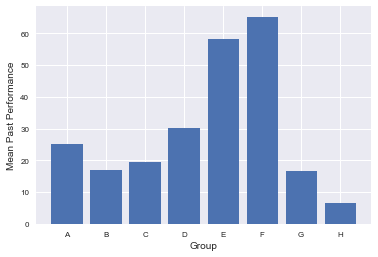

In [103]:
### YOUR CODE HERE

# The `group_summary` dataframe was created as part of Question 3's solution.
plt.bar(group_summary.index, group_summary['past_performance'].values)
plt.xlabel('Group')
plt.ylabel('Mean Past Performance')

In [126]:

def worldcup_pairwise_ttest(data, test_column = 'current_fifa_rank'):
    """Performs t-tests of independence pairwise between each of the 8 groups in the
    world cup data set. Returns a dictionary of the associated p-values."""
    pair_p_vals = {}
    grps = 'ABCDEFGH'
    for grp1_index, grp1 in enumerate(grps):
        for grp2 in grps[grp1_index+1:]:
            grp_key = '-'.join([grp1, grp2])
            grp1_data = data.loc[data.loc[:, 'group'] == grp1, test_column].values
            grp2_data = data.loc[data.loc[:, 'group'] == grp2, test_column].values
            
            pval = stats.ttest_ind(grp1_data, grp2_data, equal_var = False).pvalue
            pair_p_vals[grp_key] = pval
            
    return pair_p_vals

In [127]:
# grps = 'ABCDEFJH'
# for grp1_index, grp1 in enumerate(grps):
#     for grp2 in grps[grp1_index+1:]:
#         print(grps[grp1_index+1:])
#         grp_key = '-'.join([grp1, grp2])
# #         print(grp_key)  
#         grp1_data = df.loc[df.loc[:, 'group'] == grp1, 'current_fifa_rank'].values
#         print(grp1_data)
        
        

In [128]:
# df.loc[df['group'] == 'C']

In [130]:
past_perf_p_vals = worldcup_pairwise_ttest(df, test_column = 'past_performance')
fifa_rank_p_vals = worldcup_pairwise_ttest(df)

# Check that each dictionary has the right number of pairs:
print('past_performance pair count:', len(past_perf_p_vals))
print('current_fifa_rank pair count:', len(fifa_rank_p_vals))

past_performance pair count: 28
current_fifa_rank pair count: 28


In [132]:
# You can also use the pingouin library to do pairwise t-tests

test_results = pingouin.pairwise_ttests(data=df, dv='past_performance', between='group', alpha=0.1, correction=True)
test_results.head()

# See the documentation of the pingouin library to learn more about this function : 
# https://pingouin-stats.org/generated/pingouin.pairwise_ttests.html 

# p-unc is the Uncorrected p-value for this test.

Contrast  A  B  Paired  Parametric         T       dof       Tail     p-unc  \
0    group  A  B   False        True  0.380521  4.598603  two-sided  0.720495   
1    group  A  C   False        True  0.227738  5.819394  two-sided  0.827640   
2    group  A  D   False        True -0.164594  5.424466  two-sided  0.875223   
3    group  A  E   False        True -0.653967  3.896913  two-sided  0.549711   
4    group  A  F   False        True -0.834615  4.007803  two-sided  0.450795   

    BF10    hedges  
0  0.547  0.233973  
1  0.532  0.140030  
2  0.528 -0.101205  
3  0.594 -0.402109  
4   0.64 -0.513184

# For all the p-values obtained apply the Bonferroni and at least one other correction hypothesis tests.

In [136]:
### YOUR CODE HERE
def test_pvals_w_bonferroni(pvals_dict, alpha):
    """Applies the Bonferroni correction to the cutoff value alpha as determined 
    by the number p-values contained in pvals_dict. Then tests whether those
    p-values are at least as extreme as the cutoff. Returns a new dict with boolean
    values. True: Reject the Null. False: Fail to reject the Null."""
    alpha_bonf = alpha / len(pvals_dict)
    return {k: v < alpha_bonf for k, v in pvals_dict.items()}

past_perf_bonf_p_vals = test_pvals_w_bonferroni(past_perf_p_vals, 0.1)
fifa_rank_bonf_p_vals = test_pvals_w_bonferroni(fifa_rank_p_vals, 0.1)

# In Python True evaluates to 1 and False evaluates to 0. So use that to count things up:
print("Reject the null count, past_performance:", sum(past_perf_bonf_p_vals.values()))
print("Reject the null count, current_fifa_rank:", sum(fifa_rank_bonf_p_vals.values()))

Reject the null count, past_performance: 0
Reject the null count, current_fifa_rank: 0


In [137]:
pingouin.pairwise_ttests(data=df, dv='past_performance', between='group', alpha=0.1, padjust='bonf', correction=True)

Contrast  A  B  Paired  Parametric         T       dof       Tail  \
0     group  A  B   False        True  0.380521  4.598603  two-sided   
1     group  A  C   False        True  0.227738  5.819394  two-sided   
2     group  A  D   False        True -0.164594  5.424466  two-sided   
3     group  A  E   False        True -0.653967  3.896913  two-sided   
4     group  A  F   False        True -0.834615  4.007803  two-sided   
5     group  A  G   False        True  0.400138  4.722065  two-sided   
6     group  A  H   False        True  0.986170  3.155871  two-sided   
7     group  B  C   False        True -0.135731  5.113540  two-sided   
8     group  B  D   False        True -0.476447  3.862208  two-sided   
9     group  B  E   False        True -0.852545  3.264419  two-sided   
10    group  B  F   False        True -1.057512  3.298842  two-sided   
11    group  B  G   False        True  0.034731  5.988072  two-sided   
12    group  B  H   False        True  1.010753  3.536055  two-sided   
13    group  C  D   False        True -0.355453  4.896751  two-sided   
14    group  C  E   False        True -0.777756  3.635636  two-sided   
15    group  C  F   False        True -0.970339  3.716508  two-sided   
16    group  C  G   False        True  0.160701  5.247215  two-sided   
17    group  C  H   False        True  0.823566  3.222378  two-sided   
18    group  D  E   False        True -0.518478  4.655016  two-sided   
19    group  D  F   False        True -0.678988  4.829188  two-sided   
20    group  D  G   False        True  0.491496  3.938894  two-sided   
21    group  D  H   False        True  0.908561  3.079316  two-sided   
22    group  E  F   False        True -0.107695  5.977477  two-sided   
23    group  E  G   False        True  0.861179  3.289015  two-sided   
24    group  E  H   False        True  1.090748  3.023862  two-sided   
25    group  F  G   False        True  1.066104  3.326605  two-sided   
26    group  F  H   False        True  1.316442  3.026982  two-sided   
27    group  G  H   False        True  0.923843  3.490896  two-sided   

       p-unc  p-corr p-adjust   BF10    hedges  
0   0.720495     1.0     bonf  0.547  0.233973  
1   0.827640     1.0     bonf  0.532  0.140030  
2   0.875223     1.0     bonf  0.528 -0.101205  
3   0.549711     1.0     bonf  0.594 -0.402109  
4   0.450795     1.0     bonf   0.64 -0.513184  
5   0.706510     1.0     bonf  0.549  0.246035  
6   0.393493     1.0     bonf   0.69  0.606372  
7   0.897216     1.0     bonf  0.526 -0.083458  
8   0.659453     1.0     bonf   0.56 -0.292956  
9   0.451908     1.0     bonf  0.646 -0.524209  
10  0.361489     1.0     bonf  0.717 -0.650238  
11  0.973423     1.0     bonf  0.523  0.021356  
12  0.376213     1.0     bonf  0.699  0.621487  
13  0.737048     1.0     bonf  0.544 -0.218559  
14  0.484203     1.0     bonf  0.624 -0.478223  
15  0.390704     1.0     bonf  0.684 -0.596638  
16  0.878334     1.0     bonf  0.527  0.098811  
17  0.466729     1.0     bonf  0.637  0.506390  
18  0.627811     1.0     bonf  0.567 -0.318799  
19  0.528313     1.0     bonf    0.6 -0.417493  
20  0.649203     1.0     bonf  0.563  0.302209  
21  0.428994     1.0     bonf  0.663  0.558652  
22  0.917761     1.0     bonf  0.525 -0.066219  
23  0.447360     1.0     bonf  0.648  0.529518  
24  0.354585     1.0     bonf   0.73  0.670674  
25  0.357561     1.0     bonf   0.72  0.655521  
26  0.278831     1.0     bonf  0.836  0.809448  
27  0.414887     1.0     bonf  0.668  0.568048

In [138]:
# Applying the Bonferroni correction in this case means just comparing our p-values
# with the adjusted alpha: 0.1 / 28 = 0.00357, or equivalently multipling each of the
# p-values in our dictionary by 28 and then comparing these to the original alpha = 0.1.
# Since this is a simple calculation, we don't really need to use a stats library.
# However for more sophisticated corrections, such as Benjamini-Hochberg, it can be
# convenient to use a library:

from statsmodels.stats.multitest import multipletests

# unpack dicts into lists of p-values
perf_pval_lst = list(past_perf_p_vals.values())
fifa_pval_lst = list(fifa_rank_p_vals.values())

perf_bh_tests = multipletests(perf_pval_lst, alpha = 0.1, method = 'fdr_bh')
fifa_bh_tests = multipletests(fifa_pval_lst, alpha = 0.1, method = 'fdr_bh')

# multipletests returns a tuple of items. The first item is an array of test results.
print("Reject the null count, past_performance:", sum(perf_bh_tests[0]))
print("Reject the null count, current_fifa_rank:", sum(fifa_bh_tests[0]))

Reject the null count, past_performance: 0
Reject the null count, current_fifa_rank: 0


In [139]:
pingouin.pairwise_ttests(data=df, dv='past_performance', between='group', alpha=0.1, padjust='fdr_bh', correction=True)

Contrast  A  B  Paired  Parametric         T       dof       Tail  \
0     group  A  B   False        True  0.380521  4.598603  two-sided   
1     group  A  C   False        True  0.227738  5.819394  two-sided   
2     group  A  D   False        True -0.164594  5.424466  two-sided   
3     group  A  E   False        True -0.653967  3.896913  two-sided   
4     group  A  F   False        True -0.834615  4.007803  two-sided   
5     group  A  G   False        True  0.400138  4.722065  two-sided   
6     group  A  H   False        True  0.986170  3.155871  two-sided   
7     group  B  C   False        True -0.135731  5.113540  two-sided   
8     group  B  D   False        True -0.476447  3.862208  two-sided   
9     group  B  E   False        True -0.852545  3.264419  two-sided   
10    group  B  F   False        True -1.057512  3.298842  two-sided   
11    group  B  G   False        True  0.034731  5.988072  two-sided   
12    group  B  H   False        True  1.010753  3.536055  two-sided   
13    group  C  D   False        True -0.355453  4.896751  two-sided   
14    group  C  E   False        True -0.777756  3.635636  two-sided   
15    group  C  F   False        True -0.970339  3.716508  two-sided   
16    group  C  G   False        True  0.160701  5.247215  two-sided   
17    group  C  H   False        True  0.823566  3.222378  two-sided   
18    group  D  E   False        True -0.518478  4.655016  two-sided   
19    group  D  F   False        True -0.678988  4.829188  two-sided   
20    group  D  G   False        True  0.491496  3.938894  two-sided   
21    group  D  H   False        True  0.908561  3.079316  two-sided   
22    group  E  F   False        True -0.107695  5.977477  two-sided   
23    group  E  G   False        True  0.861179  3.289015  two-sided   
24    group  E  H   False        True  1.090748  3.023862  two-sided   
25    group  F  G   False        True  1.066104  3.326605  two-sided   
26    group  F  H   False        True  1.316442  3.026982  two-sided   
27    group  G  H   False        True  0.923843  3.490896  two-sided   

       p-unc    p-corr p-adjust   BF10    hedges  
0   0.720495  0.938061   fdr_bh  0.547  0.233973  
1   0.827640  0.951753   fdr_bh  0.532  0.140030  
2   0.875223  0.951753   fdr_bh  0.528 -0.101205  
3   0.549711  0.938061   fdr_bh  0.594 -0.402109  
4   0.450795  0.938061   fdr_bh   0.64 -0.513184  
5   0.706510  0.938061   fdr_bh  0.549  0.246035  
6   0.393493  0.938061   fdr_bh   0.69  0.606372  
7   0.897216  0.951753   fdr_bh  0.526 -0.083458  
8   0.659453  0.938061   fdr_bh   0.56 -0.292956  
9   0.451908  0.938061   fdr_bh  0.646 -0.524209  
10  0.361489  0.938061   fdr_bh  0.717 -0.650238  
11  0.973423  0.973423   fdr_bh  0.523  0.021356  
12  0.376213  0.938061   fdr_bh  0.699  0.621487  
13  0.737048  0.938061   fdr_bh  0.544 -0.218559  
14  0.484203  0.938061   fdr_bh  0.624 -0.478223  
15  0.390704  0.938061   fdr_bh  0.684 -0.596638  
16  0.878334  0.951753   fdr_bh  0.527  0.098811  
17  0.466729  0.938061   fdr_bh  0.637  0.506390  
18  0.627811  0.938061   fdr_bh  0.567 -0.318799  
19  0.528313  0.938061   fdr_bh    0.6 -0.417493  
20  0.649203  0.938061   fdr_bh  0.563  0.302209  
21  0.428994  0.938061   fdr_bh  0.663  0.558652  
22  0.917761  0.951753   fdr_bh  0.525 -0.066219  
23  0.447360  0.938061   fdr_bh  0.648  0.529518  
24  0.354585  0.938061   fdr_bh   0.73  0.670674  
25  0.357561  0.938061   fdr_bh   0.72  0.655521  
26  0.278831  0.938061   fdr_bh  0.836  0.809448  
27  0.414887  0.938061   fdr_bh  0.668  0.568048

In [140]:
# The full contents returned from multipletests (and a similar tuple for 
# for past performance):
fifa_bh_tests

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False]),
 array([0.98788607, 0.98788607, 0.98788607, 0.98788607, 0.98788607,
        0.98788607, 0.98788607, 0.98788607, 0.98788607, 0.98788607,
        0.98788607, 0.98788607, 0.98788607, 0.98788607, 0.98788607,
        0.98788607, 0.98788607, 0.98788607, 0.98788607, 0.98788607,
        0.98788607, 0.98788607, 0.98788607, 0.98788607, 0.98788607,
        0.98788607, 0.98788607, 0.98788607]),
 0.0037558048145287515,
 0.0035714285714285718)

In [142]:
# This tuple contains: Test results, corrected p-values, corrected alpha 
# using Sidak correction, corrected alpha using Bonferroni correction.  
# Let's unpack these results. When comparing the strength of teams between groups, no pair of groups meets
# our criteria of having statistically significantly different means in terms of either FIFA Rank or their
# Past Performance scores. Which is good. This is the result we would expect to see if the tournament is set
# up fairly.# EXTRA:
# When we plotted the FIFA Rankings between groups we noted that Group A's mean was higher than the rest. 
# The groups with the lowest mean with this metric (meaning they consist of strong teams) are Group C, and 
# Group E. Even though we have determined that the difference between Groups A-C and Groups A-E, DID NOT
# meet our threshold for rejecting the Null, the difference is still somewhat notable. So going back 
# and examining these values is a reasonable thing to do.

df.loc[df['group'].isin(list('ACE')), ['team', 'group', 'current_fifa_rank']]

team group  current_fifa_rank
0         Russia     A                 65
1   Saudi Arabia     A                 63
2          Egypt     A                 31
3        Uruguay     A                 21
8         France     C                  9
9      Australia     C                 39
10          Peru     C                 11
11       Denmark     C                 12
16        Brazil     E                  2
17   Switzerland     E                  8
18     Costarica     E                 26
19        Serbia     E                 37

In [143]:
# One thing that stands out in these data is that Group A has 2 teams with ranks in the 60s
# while the worst ranked teams in groups C and E are in the high 30s.

# For the curious, Wikipedia sheds some light on this somewhat surprising situation:
# https://en.wikipedia.org/wiki/2018_FIFA_World_Cup_seeding
# According to Wikipedia: "The hosts [were] placed in Pot 1 and treated as a seeded team, 
# and therefore Pot 1 consisted of hosts Russia and the seven highest-ranked teams that 
# qualify for the tournament."

# The host nation, Russia, got special treatment in the grouping method, which wss otherwise
# based on their FIFA rank at the time. -- This treatment showed up in our earlier plot.

## Additional Approaches 

There is an [allpairtest function in statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.allpairtest.html) that could be used here to combine the work from QUESTION 5 and QUESTION 6.

Generalized Linear Models (GLMs) are an appropriate tool to use here if we wanted to include the results of the tournament (maybe a ratio of wins/losses weighted by the final position in the tournament).  `statsmodels` supports [R-style formulas to fit generalized linear models](https://www.statsmodels.org/stable/examples/notebooks/generated/glm_formula.html). One additional variant of GLMs are hierarchical or multilevel models that provide even more insight into this types of dataset.  See the [tutorial on multilevel modeling](https://docs.pymc.io/notebooks/multilevel_modeling.html).

In [145]:
p1_ages = [25., 32., 20., 18., 28., 32., 31., 19., 34., 34., 23., 29., 17.,
           23., 25., 31., 32., 29., 29., 24., 22., 28., 26., 24., 23.]

p2_ages = [20., 25., 27., 19., 22., 26., 24., 27., 24., 20., 25., 28., 18.,
           19., 23., 28., 19., 19., 19., 25., 29., 26., 23., 23., 22.]

In [151]:
stats.ttest_ind(p1_ages, p2_ages).pvalue

0.01289898311225505

In [156]:
from scipy.stats import binom
average = 0.025
visitors_signed_up = 2701
total_visitors = 108879
# propability who signed up is 2701 or fewer 
k = 2701
n = 108879

In [158]:
n = 108879
p = 0.025 
mean, var = binom.stats(n, p)
mean, var

(array(2721.975), array(2653.925625))

In [159]:
stats.binom.cdf(2701, 108879, 0.025, loc=0)

0.34647434249300585